In [54]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [55]:
# importing data
df = pd.read_csv('D:/data_analysis/webscraping/shefa-sa.com/data_final_12.csv',encoding='utf-8')
df.head()

,رقم الحالة,التخصص,المنطقة,وصف الحالة
0,#235,أمراض العيون,حائل,رجل بحالة مادية صعبة جدا يعاني من وجود المياه ...
1,#463,الجراحة العامة,حائل,فتاة في مقتبل العمر تشكو من السمنة المفرطة الت...
2,#505,أمراض الكلى و المسالك البولية,حائل,أب لأسرة من ٦ أفراد من ذوي الدخل المحدود يعاني...
3,#506,أمراض الكلى و المسالك البولية,حائل,رب أسرة بدخل مادي ضعيف يعاني المريض من فشل كلو...
4,#507,أمراض الأنف و الأذن و الحنجرة,حائل,NaN


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844 entries, 0 to 2843
Data columns (total 4 columns):
رقم الحالة    2844 non-null object
التخصص        2844 non-null object
المنطقة       2844 non-null object
وصف الحالة    2690 non-null object
dtypes: object(4)
memory usage: 44.5+ KB


In [57]:
df.describe()

,رقم الحالة,التخصص,المنطقة,وصف الحالة
count,2844,2844,2844,2690
unique,2844,16,13,2689
top,#3335,أمراض الكلى و المسالك البولية,الرياض,السهم التاسع للوقف النقدي التابع لصندوق الوقف ...
freq,1,687,730,2


In [58]:
cases_by_region = df.groupby('المنطقة').count()

In [59]:
cases_by_region = pd.DataFrame(cases_by_region['رقم الحالة'])

In [60]:
cases_by_region

,رقم الحالة
المنطقة,
الباحة,41
الجوف,119
الحدود الشمالية,63
الرياض,730
القصيم,65
المدينة المنورة,454
المنطقة الشرقية,132
تبوك,1
جازان,526


In [61]:
cases_by_region.rename(columns={'رقم الحالة':'عدد الحالات'}, inplace=True)

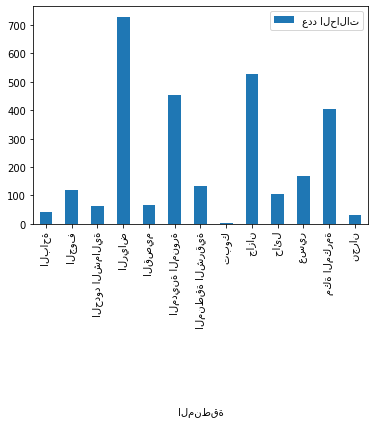

In [62]:
cases_by_region.plot(kind='bar')

In [63]:
regions = [x.strip() for x in cases_by_region.index]
cases_count = cases_by_region['عدد الحالات']

In [64]:
regions

['الباحة',
 'الجوف',
 'الحدود الشمالية',
 'الرياض',
 'القصيم',
 'المدينة المنورة',
 'المنطقة الشرقية',
 'تبوك',
 'جازان',
 'حائل',
 'عسير',
 'مكة المكرمة',
 'نجران']

In [65]:
cases_count.max()

730

In [70]:
# Getting the highest cases_count
sorted_cases_count = cases_by_region.sort_values(by='عدد الحالات',ascending=False)

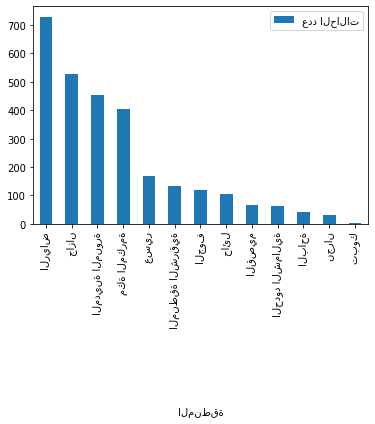

In [71]:
sorted_cases_count.plot(kind='bar')
plt.show()

In [73]:
# the heighst cases count
sorted_cases_count.head(1)

,عدد الحالات
المنطقة,
الرياض,730


In [75]:
# lowest cases count
sorted_cases_count.tail(1)

,عدد الحالات
المنطقة,
تبوك,1


In [76]:
# average by region
cases_by_region.mean()

عدد الحالات    218.769231
dtype: float64

In [116]:
cases_by_spec = df.groupby('التخصص')['رقم الحالة'].count()
specializations_info = pd.DataFrame(cases_by_spec)

In [121]:
# specializations_info.rename(columns={'رقم الحالة':'عدد الحالات'})
specializations_info = specializations_info.sort_values(by='عدد الحالات',ascending=False)
specializations_info

,عدد الحالات
التخصص,
أمراض الكلى و المسالك البولية,687
أمراض العيون,578
الجراحة العامة,358
أمراض النساء و الولادة,344
أمراض الدم و الأورام,234
أمراض العظام و المفاصل,165
ادوية علاجية,125
اجهزة طبية,108
أمراض الأنف و الأذن و الحنجرة,74


In [122]:
# Top specialization cases
specializations_info.head(1)

,عدد الحالات
التخصص,
أمراض الكلى و المسالك البولية,687


In [123]:
# least specialization cases
specializations_info.tail(1)

,عدد الحالات
التخصص,
الأمراض الجلدية,1


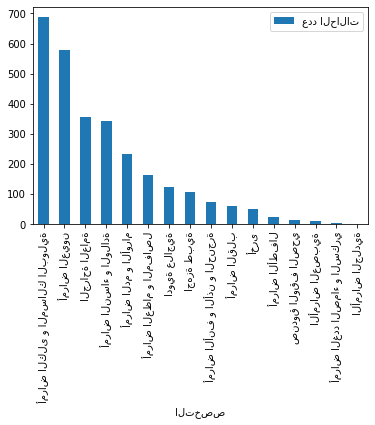

In [124]:
specializations_info.plot(kind='bar')
plt.show()

## The majority of patients have kidney desease
#### Can that be due to salts in water?
#### Is there any other factor?

# Hypothesis is : There is a linear relationship between the water quality and kidney issues.

In [130]:
# regions matching kidney desease
kidney_cases = df.query('التخصص == "أمراض الكلى و المسالك البولية"')

In [131]:
kidney_cases

,رقم الحالة,التخصص,المنطقة,وصف الحالة
2,#505,أمراض الكلى و المسالك البولية,حائل,أب لأسرة من ٦ أفراد من ذوي الدخل المحدود يعاني...
3,#506,أمراض الكلى و المسالك البولية,حائل,رب أسرة بدخل مادي ضعيف يعاني المريض من فشل كلو...
5,#510,أمراض الكلى و المسالك البولية,حائل,ربة منزل بلا عمل تعاني من فشل كلوي مزمن حاد وا...
6,#514,أمراض الكلى و المسالك البولية,حائل,سيدة لأسرة من ١٥ فرد بدخل ضعيف جدا تعاني من فش...
7,#516,أمراض الكلى و المسالك البولية,حائل,فتاة في مقتبل العمر وعائلها الوحيد يعمل بأجر ي...
...,...,...,...,...
2820,#4051,أمراض الكلى و المسالك البولية,مكة المكرمة,فتاة في الـ22 من عمرها تعيش مع أسرتها في السعو...
2835,#4082,أمراض الكلى و المسالك البولية,مكة المكرمة,فتاة تعيش في السعودية مع أسرتها المكونة من 13 ...
2837,#4084,أمراض الكلى و المسالك البولية,مكة المكرمة,سيدة تعيش في السعودية مع زوجها الذي يعمل بأجر ...
2840,#4091,أمراض الكلى و المسالك البولية,جازان,سيدة تعيش في السعودية مع زوجها بوضع معيشي سيء ...


In [138]:
kidney_cases_by_region = pd.DataFrame(kidney_cases.groupby('المنطقة').count()['رقم الحالة'])

In [139]:
kidney_cases_by_region

,رقم الحالة
المنطقة,
الباحة,1
الجوف,3
الحدود الشمالية,7
الرياض,247
القصيم,34
المدينة المنورة,111
المنطقة الشرقية,11
جازان,30
حائل,43


# Consider Reyadh
### There are 247 cases in Reyadh of Kidney cases.
#### Back to the water index quality research held by Abdulrasoul Al-Omran; Fahad Al-Barakah; Abdullah Altuquq; Anwar Aly; Mahmoud Nadeem
#### Link to research: https://iwaponline.com/wqrj/article/50/3/287/21614/Drinking-water-quality-assessment-and-water
* One hundred and eighty drinking water samples were collected from five zones of Riyadh governorate including Riyadh main zone, Ulia, Nassim, Shifa, and Badiah zones. The water was collected from the main water network and underground and upper household tanks in each zone. The water quality was found to be acceptable for drinking with respect to chemical characteristics; however, analyses exhibited some microbial contamination. The water quality index (WQI) is a mathematical method used to facilitate water quality explanation. The WQI was calculated using several physico-chemical and microbial parameters. The results showed that more than 88% of Riyadh main zone, 91% of Ulia, 97% of Nassim, 88% of Shifa, and 100% of Badiah waters zones were considered excellent for drinking (class I). The remaining waters were considered unsuitable for drinking (class V) due to microbial contamination.

## Based on the previous article The majority of Reyadh zones have classI water quality index. So, it must be other factors for those kidney cases.